# Business Understanding

## Business Question

- In relation to sales, what is the correlation between authors and book ratings? Is there a correlation between the popularity of authors or the book ratings and the volume of sales?

- Which book genres have seen the highest sales volume? Are there specific genres that consistently outsell others ?

- In relation to sales, what is the correlation between authors and book ratings? Is there a correlation between the popularity of authors or the book ratings and the volume of sales?

# Data Uderstanding

- 'index': This might be the index or row number in your dataset. Usually, it's the default index from pandas indicating the row position.
- 'Publishing Year': This column contains the year of publication of the book.
- 'Book Name': It's the name of the published book.
- 'Author': The name of the book's author.
- 'language_code': The language code used in the book.
- 'Author_Rating': Perhaps a rating or assessment given to the author based on their previous work.
- 'Book_average_rating': The average rating given by readers for the book.
- 'Book_ratings_count': The count of ratings given by readers for the book.
- 'genre': The genre or category of the book.
- 'gross sales': The total revenue generated from book sales.
- 'publisher revenue': The revenue earned by the publisher from book sales.
- 'sale price': The selling price of the book.
- 'sales rank': The book's sales ranking within a specific period.
- 'Publisher': The name of the book's publisher.
- 'units sold': The number of book units sold.

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
books_df = pd.read_csv('/kaggle/input/books-sales-and-ratings/Books_Data_Clean.csv')
books_df.head(5)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


## Assesing Data

In [3]:
# Check Missing Values
books_df.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [4]:
# Check Data Type
books_df.dtypes

index                    int64
Publishing Year        float64
Book Name               object
Author                  object
language_code           object
Author_Rating           object
Book_average_rating    float64
Book_ratings_count       int64
genre                   object
gross sales            float64
publisher revenue      float64
sale price             float64
sales rank               int64
Publisher               object
units sold               int64
dtype: object

In [5]:
# Check Duplicated Data
print('Duplicated :',books_df.duplicated().sum())

Duplicated : 0


## Cleaning Data

**Handling Missing Values**

In [6]:
books_df.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [7]:
null_values = books_df[books_df.isnull().any(axis=1)]
null_values

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
22,22,1991.0,Needful Things,Stephen King,NaN,Intermediate,3.87,153821,genre fiction,2772.00,0.000,0.99,23,"Amazon Digital Services, Inc.",2800
24,24,1996.0,NaN,"Kenneth Branagh, William Shakespeare",eng,Intermediate,4.12,156869,genre fiction,2639.34,1583.604,0.99,25,"Amazon Digital Services, Inc.",2666
34,34,2007.0,NaN,Brandon Sanderson,eng,Intermediate,4.35,150736,genre fiction,17980.00,10788.000,8.99,35,Random House LLC,2000
74,74,2007.0,"Are You There, Vodka? It's Me, Chelsea",Chelsea Handler,NaN,Intermediate,3.85,127096,genre fiction,5462.31,3277.386,3.99,76,Hachette Book Group,1369
105,105,2011.0,NaN,Mark Cotta Vaz,eng,Intermediate,4.30,188136,genre fiction,7670.40,4602.240,7.99,108,Penguin Group (USA) LLC,960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,1031,2015.0,NaN,Colleen Hoover,en-GB,Excellent,4.25,72611,nonfiction,1175.93,705.558,10.99,1218,"Amazon Digital Services, Inc.",107
1032,1032,2012.0,Pines,Blake Crouch,NaN,Intermediate,3.88,34789,genre fiction,105.93,0.000,0.99,1218,"Amazon Digital Services, Inc.",107
1033,1033,1994.0,Disclosure,Michael Crichton,NaN,Intermediate,3.76,57818,genre fiction,854.93,512.958,7.99,1219,Random House LLC,107
1059,1059,1955.0,Beezus and Ramona,Beverly Cleary,NaN,Intermediate,3.97,75987,genre fiction,740.94,444.564,6.99,1257,Random House LLC,106


In [8]:
med_year = books_df['Publishing Year'].median()
books_df['Publishing Year'].fillna(med_year,inplace=True)

In [9]:
mod_language = books_df['language_code'].mode()[0]
books_df['language_code'].fillna(mod_language, inplace = True)

In [10]:
books_df['Book Name'].fillna("Untitled Book",inplace=True)

In [11]:
books_df.isna().sum()

index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64

**Handling Data Types**

In [12]:
books_df['Publishing Year'] = books_df['Publishing Year'].astype(int)

In [13]:
books_df.dtypes

index                    int64
Publishing Year          int64
Book Name               object
Author                  object
language_code           object
Author_Rating           object
Book_average_rating    float64
Book_ratings_count       int64
genre                   object
gross sales            float64
publisher revenue      float64
sale price             float64
sales rank               int64
Publisher               object
units sold               int64
dtype: object

# Exploratory Data Analysis (EDA)

### Explore Books_df

**Mencari Tahun Paling Banyak Penerbitan**

In [14]:
year_counts = books_df['Publishing Year'].value_counts().head(5)
year_counts

Publishing Year
2012    68
2011    55
2009    46
2010    44
2006    41
Name: count, dtype: int64

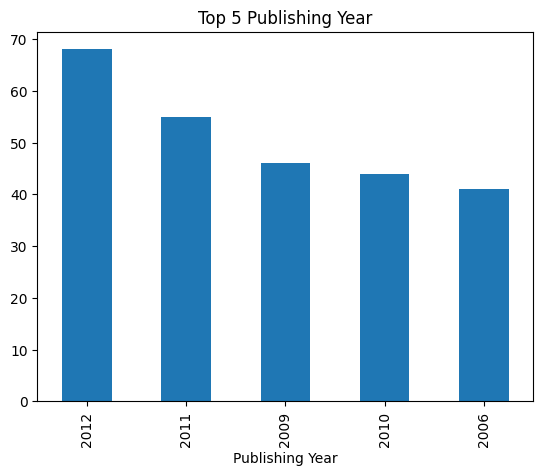

In [15]:
plt.title('Top 5 Publishing Year')
plt.xlabel('Publishing Year')
year_counts.plot(kind='bar')
plt.show()

**Perbandingan Langguage code**

In [16]:
language = books_df['language_code'].value_counts()
pd.DataFrame(language)

,count
language_code,
eng,790
en-US,234
en-GB,30
en-CA,7
fre,4
spa,2
ara,2
nl,1


**Perbandingan rating author**

In [17]:
author_rating = books_df['Author_Rating'].value_counts()
author_rating

Author_Rating
Intermediate    625
Excellent       362
Famous           53
Novice           30
Name: count, dtype: int64

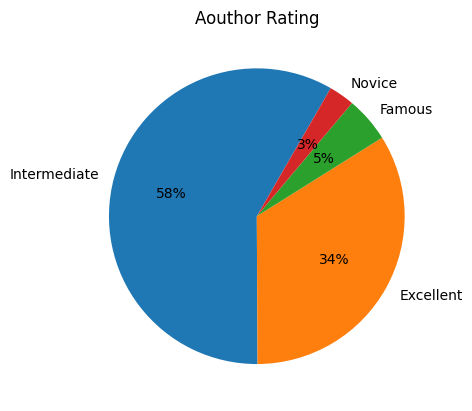

In [18]:
plt.title('Aouthor Rating')
plt.pie(author_rating, labels=author_rating.index, autopct='%1.0f%%',startangle=60)
plt.xticks(rotation=90)
plt.show()

**Perbandingan Genre**

In [19]:
genre = books_df['genre'].value_counts()
genre

genre
genre fiction    822
nonfiction       171
fiction           62
children          15
Name: count, dtype: int64

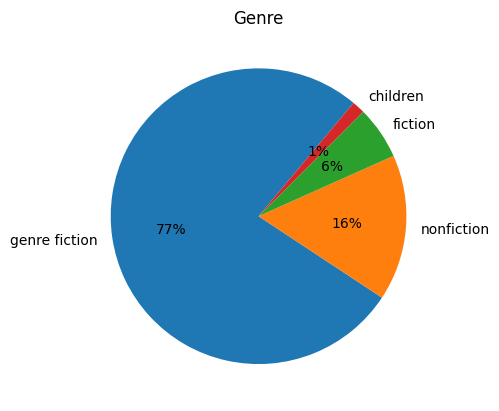

In [20]:
plt.title('Genre')
plt.pie(genre, labels= genre.index, autopct='%1.0f%%',startangle=50)
plt.xticks(rotation=90)
plt.show()

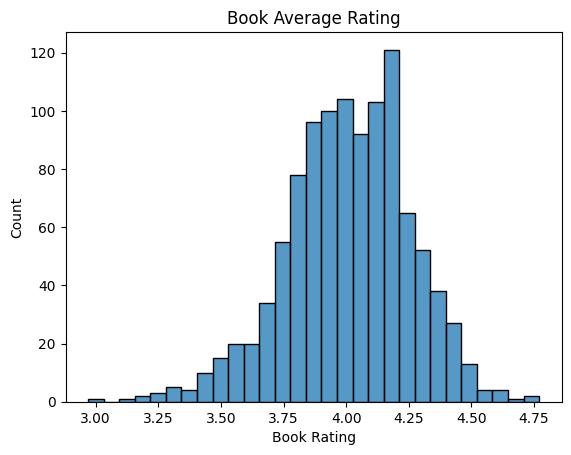

In [21]:
plt.title('Book Average Rating')
plt.xlabel('Book Rating')
sns.histplot(data=books_df, x=books_df['Book_average_rating'])
plt.show()

In [22]:
publisher_counts = books_df['Publisher '].value_counts()
publisher_counts

Publisher 
Amazon Digital Services,  Inc.          600
Random House LLC                        120
Penguin Group (USA) LLC                 108
HarperCollins Publishers                 71
Hachette Book Group                      66
Simon and Schuster Digital Sales Inc     56
Macmillan                                41
HarperCollins Publishing                  4
HarperCollins Christian Publishing        4
Name: count, dtype: int64

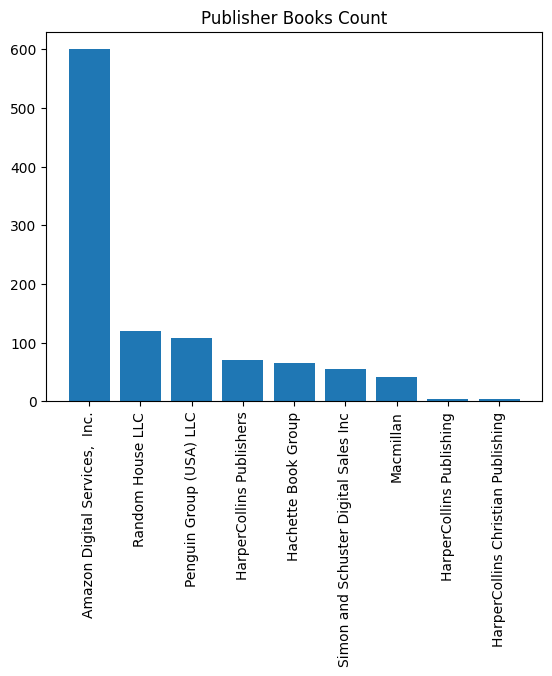

In [23]:
plt.title('Publisher Books Count')
plt.bar(x=publisher_counts.index, height= publisher_counts.values)
plt.xticks(rotation=90)
plt.show()

In [24]:
famous_author = books_df[books_df['Author_Rating']=='Famous']
top5_famous_author = famous_author['Author'].value_counts().head(5)
top5_famous_author

Author
Sarah J. Maas                       4
Jim Butcher                         4
Brandon Sanderson                   3
Robert Jordan, Brandon Sanderson    2
Stephen King                        2
Name: count, dtype: int64

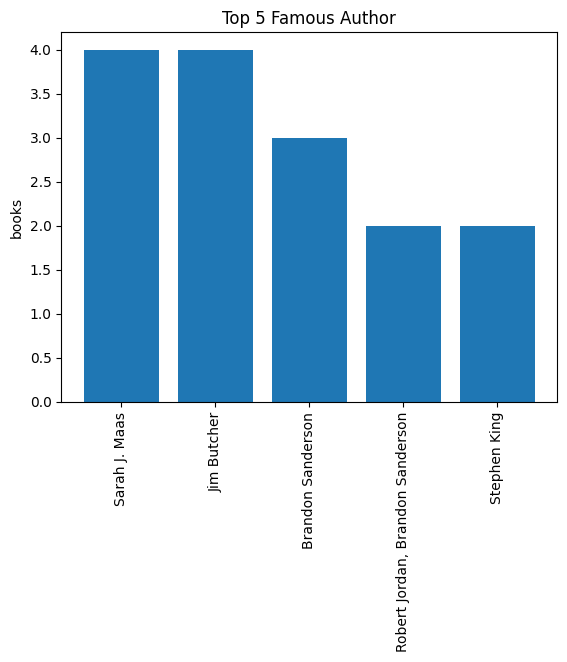

In [25]:
plt.title('Top 5 Famous Author')
plt.bar(x=top5_famous_author.index, height = top5_famous_author.values)
plt.ylabel('books')
plt.xticks(rotation=90)
plt.show()

In [26]:
genre = books_df[['genre','units sold']]
genre_sales = genre.groupby('genre')['units sold'].sum().reset_index()
print('      Genre Sales')
print('---------------------')
genre_sales = genre_sales.sort_values(by='units sold', ascending=False).reset_index(drop=True)
genre_sales

      Genre Sales
---------------------


,genre,units sold
0,genre fiction,7875834
1,nonfiction,1634759
2,fiction,545658
3,children,298118


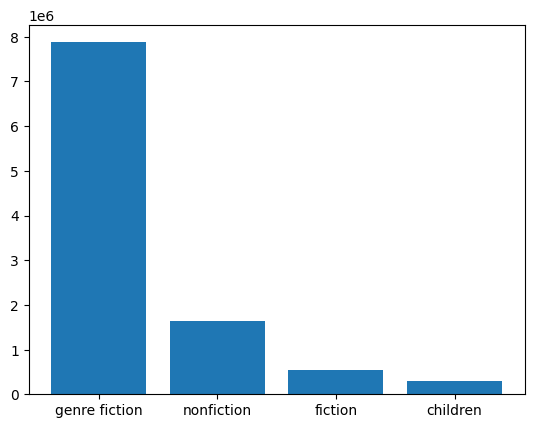

In [27]:
plt.bar(x= genre_sales['genre'], height = genre_sales['units sold'])
plt.show()

In [28]:
sales = books_df[['Publishing Year','units sold']]
sales = sales[books_df['Publishing Year'] >= 0]
sales_trend = sales.groupby('Publishing Year')['units sold'].sum().reset_index()
sales_trend = sales_trend.sort_values(by = 'Publishing Year', ascending = False).reset_index(drop=True).head(10)
sales_trend 

,Publishing Year,units sold
0,2016,91276
1,2015,231140
2,2014,182342
3,2013,422449
4,2012,769084
5,2011,635477
6,2010,489571
7,2009,468282
8,2008,150000
9,2007,427143


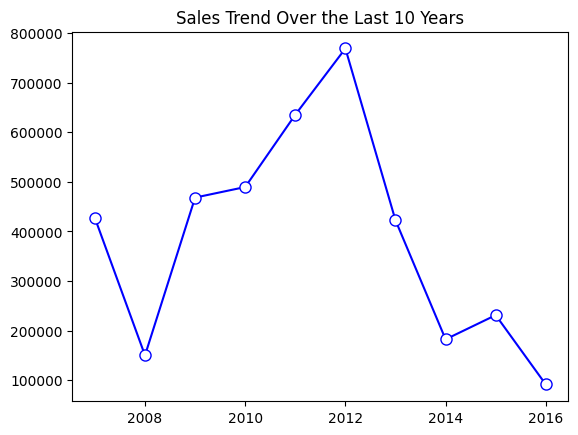

In [29]:
plt.title('Sales Trend Over the Last 10 Years')
plt.plot(sales_trend['Publishing Year'], sales_trend['units sold'], marker='o', color='blue', markerfacecolor='white', markersize=8)
plt.show()

In [30]:
rating_sold = books_df[['Book_average_rating','units sold','sale price']]
rating_sold_corr = rating_sold.corr()
rating_sold_corr

,Book_average_rating,units sold,sale price
Book_average_rating,1.000000,-0.008516,0.000290
units sold,-0.008516,1.000000,0.004248
sale price,0.000290,0.004248,1.000000


# Visualization & Explanatory Analysis

## How has the trend been for total book sales over the last 10 years? Are there any significant increases or decreases from year to year?

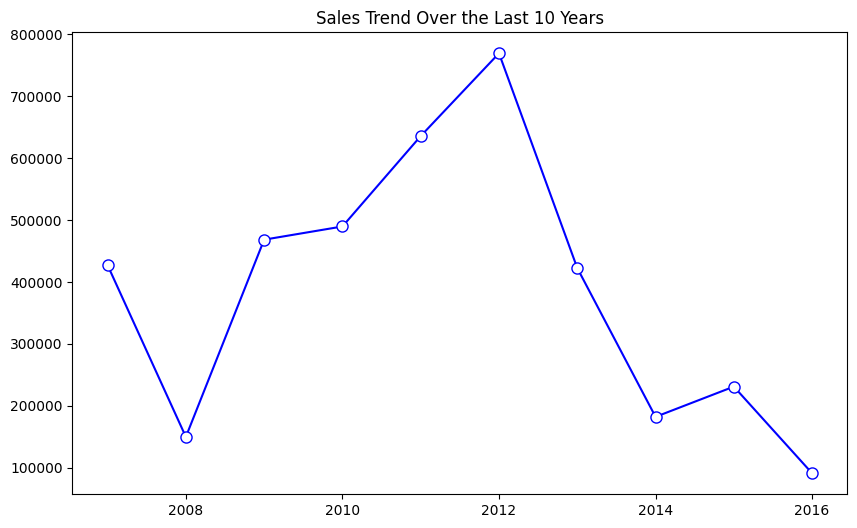

In [31]:
plt.figure(figsize=(10, 6))
plt.title('Sales Trend Over the Last 10 Years')
plt.plot(sales_trend['Publishing Year'], sales_trend['units sold'], marker='o', color='blue', markerfacecolor='white', markersize=8)
plt.show()

**Conclusion**

The book sales data spanning from 2007 to 2016 displays a notable declining trend in sales volume throughout the period. After experiencing fluctuations in the initial years, a consistent rise led to a peak in 2012 with sales reaching 769,084 units. However, a sharp decline followed post-2012, plummeting to 91,276 units by the year 2016. This trend highlights significant shifts in buyer preferences or external factors influencing the book publishing industry. Further analysis is required to comprehend the root causes behind the drastic decline in book sales and its implications for the overall book market.

## Which book genres have seen the highest sales volume? Are there specific genres that consistently outsell others ?

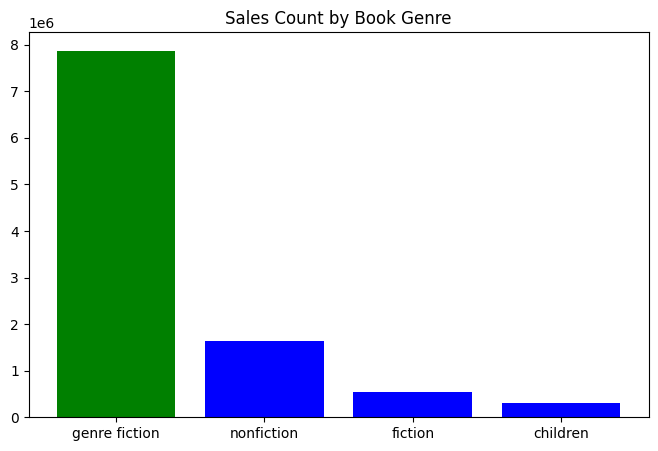

In [32]:
color = ['green','blue','blue','blue','blue']
plt.figure(figsize=(8,5))
plt.title("Sales Count by Book Genre")
plt.bar(x= genre_sales['genre'], height = genre_sales['units sold'],color=color)
plt.show()

**Conclusion**

From the genre-based sales data, it's evident that the genre fiction leads the book sales significantly, reflecting a strong consumer preference for this category. This underscores substantial business opportunities within the publishing industry to focus more on the genre fiction in marketing strategies, development, and production. While non-fiction, fiction, and children's books also contribute to sales, strategies considering a diverse genre development while acknowledging their popularity and purchasing trends could provide valuable insights for the publishing industry to enhance its product portfolio.

## In relation to sales, what is the correlation between authors and book ratings? Is there a correlation between the popularity of authors or the book ratings and the volume of sales?

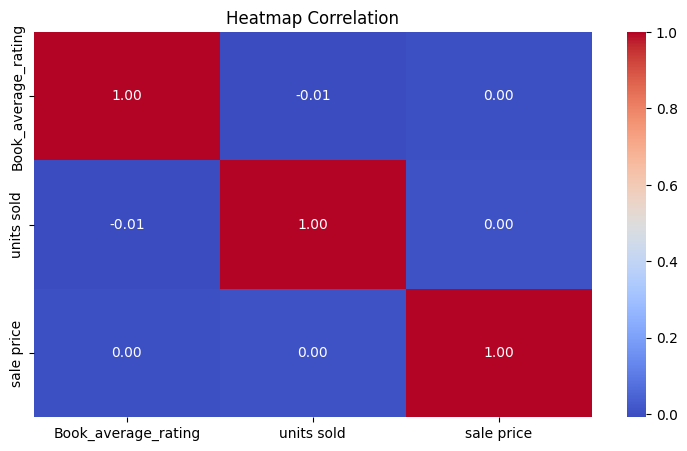

In [33]:
plt.figure(figsize=(9, 5))
sns.heatmap(rating_sold_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Correlation')
plt.show()

**Conclusion**

From the correlation observed among book average ratings, units sold, and sale prices, there appears to be no significant correlation between the book rating, sale price, and the volume of units sold. The correlations, close to zero, indicate a lack of strong linear relationships between the average book rating, sale price, and the volume of units sold. Therefore, to optimize book sales, comprehensive and diverse business strategies such as intelligent marketing, targeted market penetration, and a focus on consumer needs and preferences might be more relevant than solely relying on book ratings or a singular sale price to enhance the volume of units sold.